<a href="https://colab.research.google.com/github/KieuSonTung/Machine-Learning-2/blob/main/Week1_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
iris = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML2/Data/iris.data', names=['x1', 'x2', 'x3', 'x4', 'y'])
iris.head()

,x1,x2,x3,x4,y
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.describe()

,x1,x2,x3,x4
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      150 non-null    float64
 1   x2      150 non-null    float64
 2   x3      150 non-null    float64
 3   x4      150 non-null    float64
 4   y       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
X = iris.drop(columns='y')
Y = iris['y']
X


,x1,x2,x3,x4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


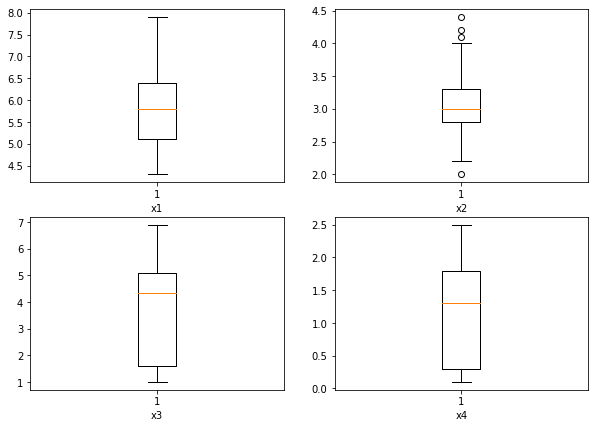

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 7))
ax1.boxplot(x='x1', data=X)
ax1.set(xlabel='x1')
ax2.boxplot(x='x2', data=X)
ax2.set(xlabel='x2')
ax3.boxplot(x='x3', data=X)
ax3.set(xlabel='x3')
ax4.boxplot(x='x4', data=X)
ax4.set(xlabel='x4')
plt.show()

In [ ]:
X1 = X.copy()
X1 = pd.DataFrame(StandardScaler().fit_transform(X1), columns=['x1', 'x2', 'x3', 'x4'])
X1.head()

,x1,x2,x3,x4
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


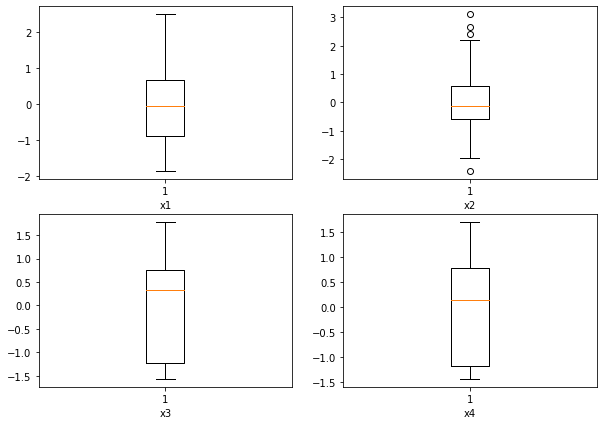

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 7))
ax1.boxplot(x='x1', data=X1)
ax1.set(xlabel='x1')
ax2.boxplot(x='x2', data=X1)
ax2.set(xlabel='x2')
ax3.boxplot(x='x3', data=X1)
ax3.set(xlabel='x3')
ax4.boxplot(x='x4', data=X1)
ax4.set(xlabel='x4')
plt.show()

In [ ]:
np.array(X1.iloc[0, :X1.shape[1]]).reshape(1, -1).shape
# np.array(X1.iloc[0, :X1.shape[1]]).reshape(-1, 1).shape
# i=0
# np.dot(np.array(X1.iloc[i, :X1.shape[1]]).reshape(1, -1), np.array(X1.iloc[i, :X1.shape[1]]).reshape(-1, 1))

(1, 4)

In [ ]:
# S: covariance matrix
S = np.sum(np.dot(np.array(X1.iloc[i, :X1.shape[1]]).reshape(-1, 1), np.array(X1.iloc[i, :X1.shape[1]]).reshape(1, -1)) for i in range(X1.shape[0]))
S

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


array([[150.        , -16.40538749, 130.7631236 , 122.69304501],
       [-16.40538749, 150.        , -63.07741446, -53.48161344],
       [130.7631236 , -63.07741446, 150.        , 144.41356456],
       [122.69304501, -53.48161344, 144.41356456, 150.        ]])

In [ ]:
# b: eigenvalues, v: eigenvectors

b, v = np.linalg.eig(S)
Sigma = np.zeros((S.shape[0], S.shape[1]))
Sigma[:S.shape[0], :S.shape[1]] = np.diag(b)
Sigma


array([[436.62271256,   0.        ,   0.        ,   0.        ],
       [  0.        , 138.18313961,   0.        ,   0.        ],
       [  0.        ,   0.        ,  22.10299175,   0.        ],
       [  0.        ,   0.        ,   0.        ,   3.09115609]])

In [ ]:
# double check
np.dot(v, np.dot(Sigma, np.linalg.inv(v)))

array([[150.        , -16.40538749, 130.7631236 , 122.69304501],
       [-16.40538749, 150.        , -63.07741446, -53.48161344],
       [130.7631236 , -63.07741446, 150.        , 144.41356456],
       [122.69304501, -53.48161344, 144.41356456, 150.        ]])

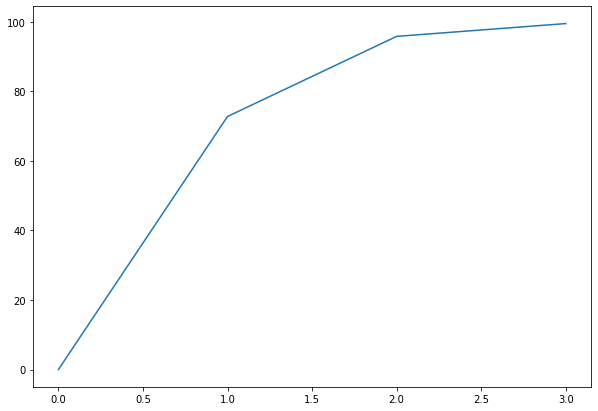

In [ ]:
# sort the eigenvalues in descending order

info = []
for i in range(b.shape[0]):
    s = sum(b[:i])/sum(b) * 100
    info.append(s)

fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(np.arange(0, b.shape[0]), info)
plt.show()

In [ ]:
print('Information percentage remains:', float(info[2]))

Information percentage remains: 95.800975361482


In [ ]:
z1 = []
for i in range(X1.shape[0]):
    a = float(np.dot(v[:v.shape[0], 0].reshape(1, -1), np.array(X1.iloc[i, :X1.shape[1]]).reshape(-1, 1)))
    b = float(np.dot(v[:v.shape[0], 1].reshape(1, -1), np.array(X1.iloc[i, :X1.shape[1]]).reshape(-1, 1)))
    z1.append([a, b])

PC = pd.DataFrame(data=z1, columns=['pc1', 'pc2'])
PC.head()


,pc1,pc2
0,-2.264542,-0.505704
1,-2.086426,0.655405
2,-2.367950,0.318477
3,-2.304197,0.575368
4,-2.388777,-0.674767


In [ ]:
PC = pd.concat([PC, Y], axis=1)
PC.head()

,pc1,pc2,y
0,-2.264542,-0.505704,Iris-setosa
1,-2.086426,0.655405,Iris-setosa
2,-2.367950,0.318477,Iris-setosa
3,-2.304197,0.575368,Iris-setosa
4,-2.388777,-0.674767,Iris-setosa


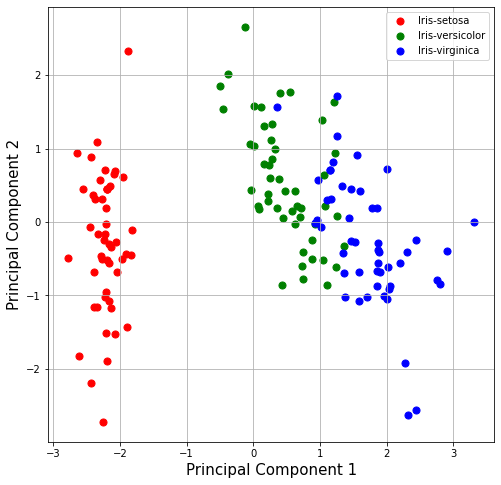

In [ ]:
# Visualize

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = PC['y'] == target
    ax.scatter(PC.loc[indicesToKeep, 'pc1']
               , PC.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## PCA using sklearn

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X1)

pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [ ]:
# eigenvalues
pca.singular_values_

array([20.89551896, 11.75513248])

In [ ]:
finaldf = pd.concat([principalDf, Y], axis = 1)
finaldf.head()

,principal component 1,principal component 2,y
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


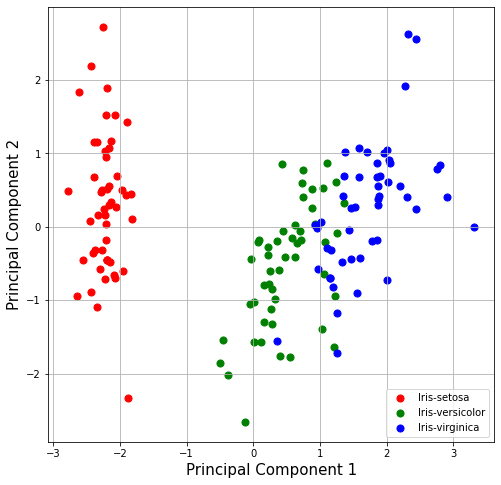

In [ ]:
# Visualize

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['y'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'principal component 1']
               , finaldf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()